<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



First, let's get the data and take a look at what it looks like and get an idea of what we are dealing with. So I will be reading the data, using get_csv_data function, then print a few things like shape, head etc to get an idea of the data. 

In [183]:
import pandas as pd
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt
import seaborn as sns

def get_csv_data(url):
  df = pd.read_csv(url)
  return df

url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
full_df = get_csv_data(url)

print("data shape is", full_df.shape)
print(full_df.info())
print(full_df.head())

data shape is (1304, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB
None
         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [184]:
#Convert date column to datetime type since it is currently object type data

full_df['date'] = pd.to_datetime(full_df['date'])

#get day, month, year from datetime 
full_df['year'] = full_df['date'].dt.year
full_df['month'] = full_df['date'].dt.strftime('%B')
full_df['day'] = full_df['date'].dt.day

#set date as index
full_df.set_index('date')

#get a look at top 2.5% and bottom 2.5% of the page views
Q1 = full_df['value'].quantile(0.025)
Q3 = full_df['value'].quantile(0.975)
IQR = Q3 - Q1
#top_df = full_df.sort_values('value', ascending = False).head(int(full_df.shape[0]*0.025))
#bottom_df = full_df.sort_values('value').head(int(full_df.shape[0]*0.025))

#filter out the top 2.5% and bottom 2.5% of the page views
#filter_df = full_df.sort_values('value')
#N = round(full_df.shape[0]*0.025)
#filter_df = full_df.iloc[N: , :N]

filter_df = full_df[~((full_df['value'] < (Q1 - 1.5 * IQR)) | (full_df['value'] > (Q3 + 1.5 * IQR)))]

print(filter_df)


           date   value  year     month  day
0    2016-05-09    1201  2016       May    9
1    2016-05-10    2329  2016       May   10
2    2016-05-11    1716  2016       May   11
3    2016-05-12   10539  2016       May   12
4    2016-05-13    6933  2016       May   13
...         ...     ...   ...       ...  ...
1299 2019-11-29  171584  2019  November   29
1300 2019-11-30  141161  2019  November   30
1301 2019-12-01  142918  2019  December    1
1302 2019-12-02  220144  2019  December    2
1303 2019-12-03  158549  2019  December    3

[1302 rows x 5 columns]


Now that I have cleaned the data, I will see what the line plot looks like, next.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


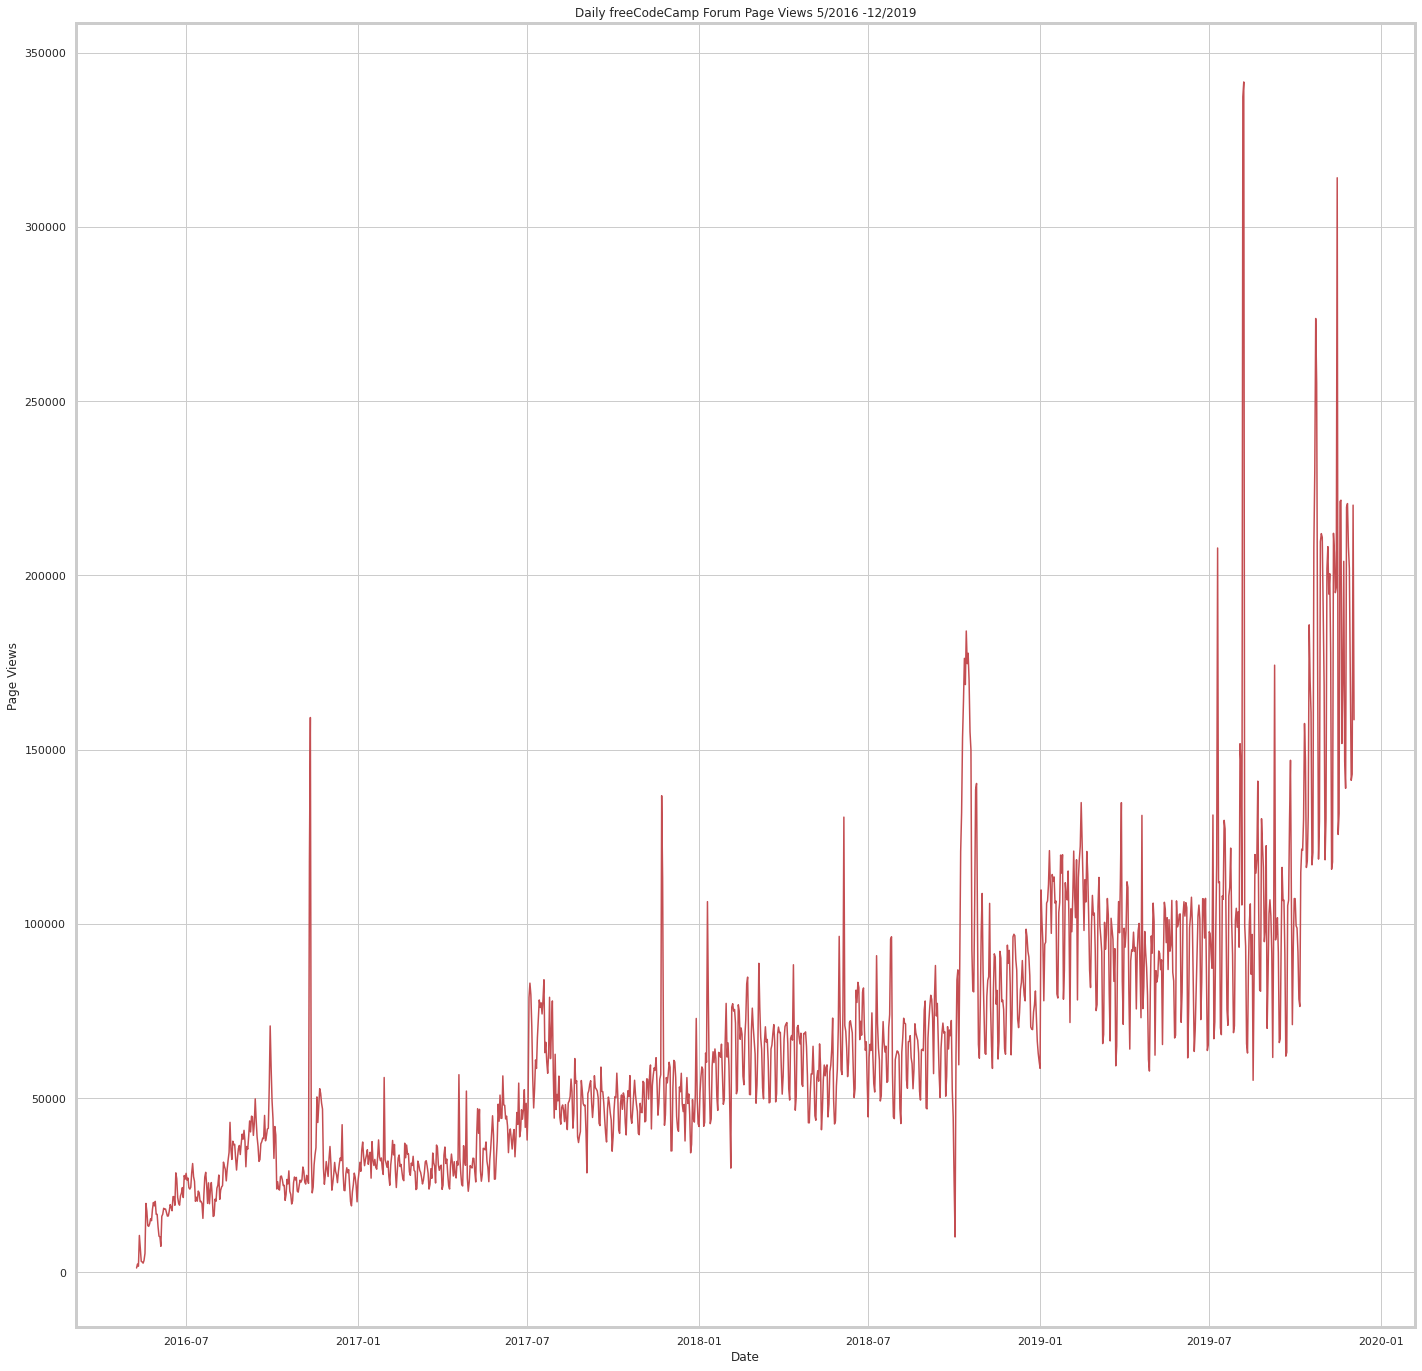

In [258]:
#Plot line chart using matplotlib
fig, ax = plt.subplots()
plt.rcParams['lines.color'] = 'black'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams.update({'font.size': 22})
yr = filter_df['date']
view = filter_df['value']
plt.plot(yr, view, color = 'r')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016 -12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
#plt.xticks([2016-07, 2017-01, 2017-07, 2018-01,2018-07,2019-01,2019-07, 2020-01]) 

# Increase the current axis by 200% to see better
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*3, box.height*2])

plt.show()

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


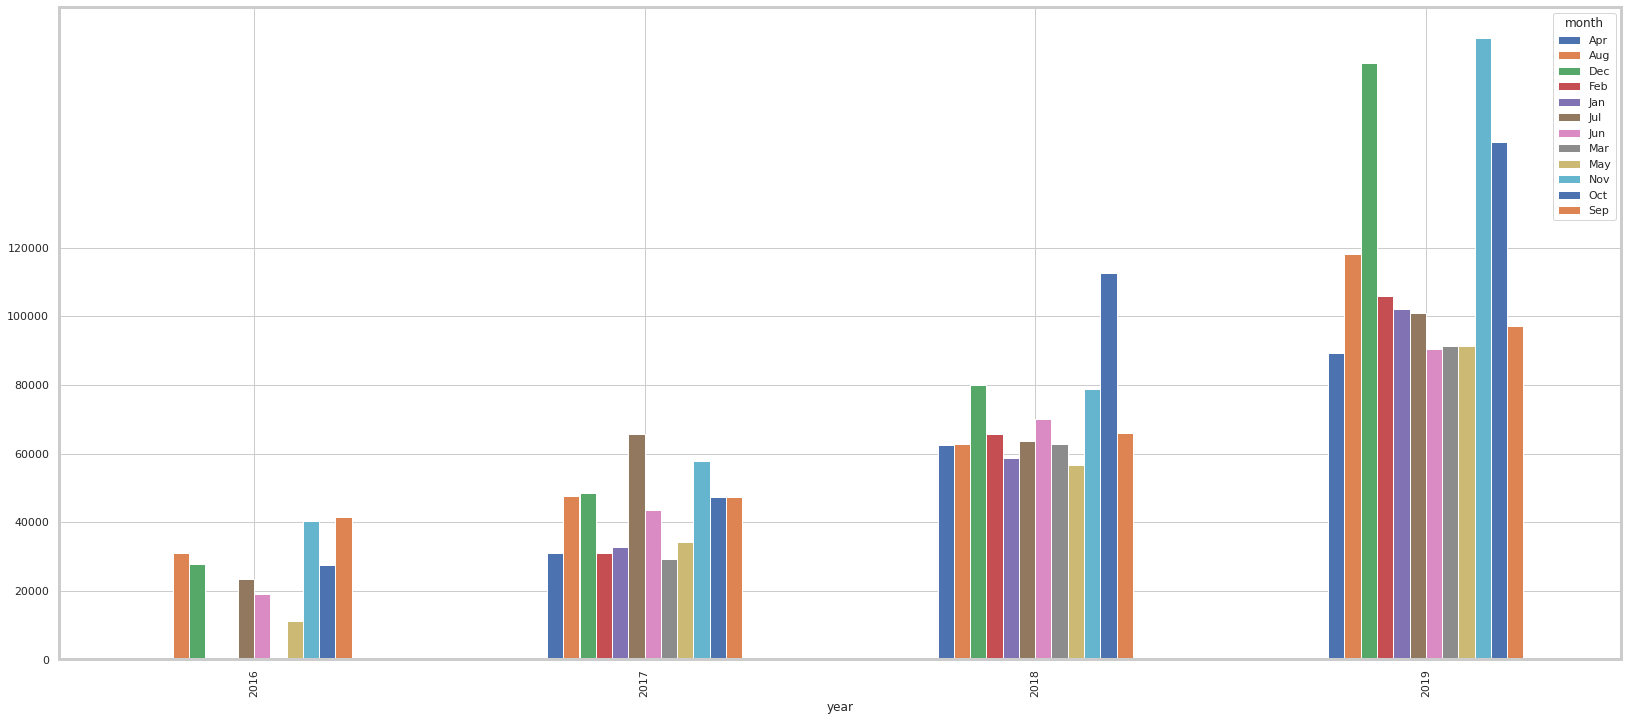

In [259]:
table = pd.pivot_table(filter_df, values='value', index=['year'],
                    columns=['month'], aggfunc=np.mean, fill_value=0)
fig, ax = plt.subplots()
table.plot(kind='bar', ax=ax)
plt.yticks(np.arange(0, 140000, step=20000))

# Increase the current axis by 200% to see better
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*3.5, box.height])

# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

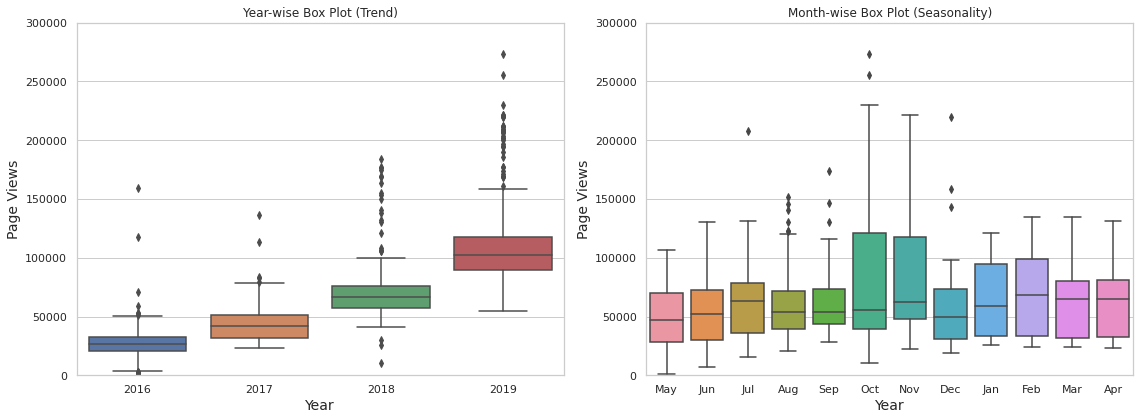

In [251]:
from datetime import datetime
from matplotlib.dates import DateFormatter

filter_df['month'] = filter_df['date'].dt.strftime('%b')
fig_dims = (16, 6)
f, axes = plt.subplots(1, 2, figsize=fig_dims)
bp1 = sns.boxplot(  y="value", x= "year", data=filter_df,  ax=axes[0])
bp2 = sns.boxplot(  y="value", x= "month", data=filter_df, ax=axes[1])
bp1.set_ylim([0, 300000])
bp1.set_xlabel("Year", fontsize = 14)
bp1.set_ylabel("Page Views", fontsize = 14)
bp1.set_title ("Year-wise Box Plot (Trend)")
bp2.set_ylim([0, 300000])
bp2.set_xlabel("Year", fontsize = 14)
bp2.set_ylabel("Page Views", fontsize = 14)
bp2.set_title ("Month-wise Box Plot (Seasonality)")

#g = sns.catplot(x="month", y="value", hue="month", col="year", data=filter_df, kind="box", height=4, aspect=.7);


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


In [262]:
!pip install --upgrade openpyxl

In [304]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats.stats import pearsonr

x= filter_df['year']
y= filter_df['value']

lin_model = stats.linregress(x, y)
print(lin_model)
print(f"The slope is: {lin_model.slope:.4f}")
print(f"The intercept is: {lin_model.intercept:.4f}")
print(f"R-squared: {lin_model.rvalue**2:.4f}")


LinregressResult(slope=28391.774800177624, intercept=-57218084.38431659, rvalue=0.737653322775382, pvalue=5.271213369540628e-224, stderr=720.7554150850589)
The slope is: 28391.7748
The intercept is: -57218084.3843
R-squared: 0.5441


We now have y = slope*x+intercept which is 
page_views = 28392*year-57218084

So let's see how the plot looks like.

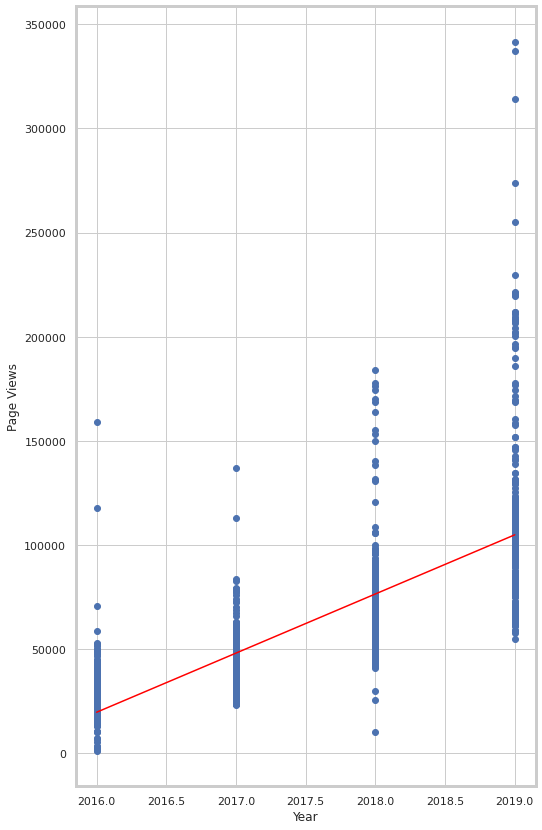

In [310]:
plt.scatter(x, y)
plt.plot(x, lin_model.intercept + lin_model.slope*x, color='red')
plt.xlabel("Year")
plt.ylabel("Page Views")
plt.show()

Double checking with seaborn

Text(0, 0.5, 'Page Views')

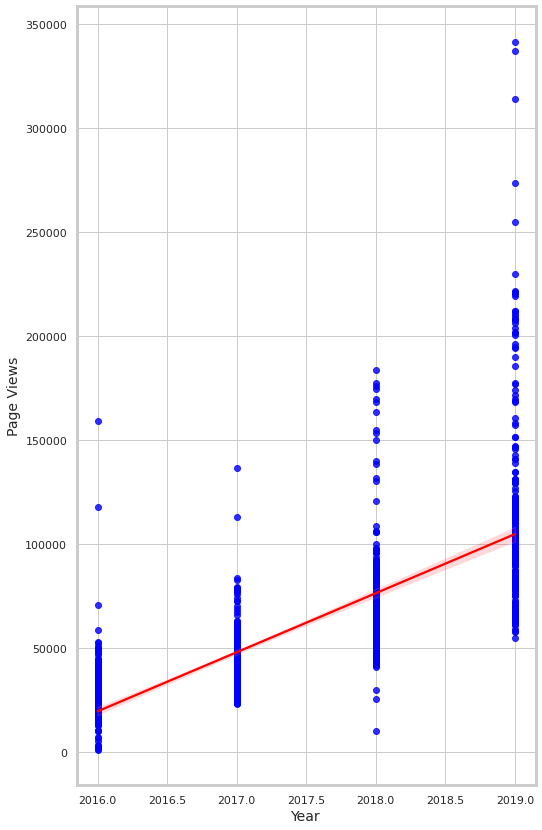

In [309]:
chart=sns.regplot(x=x, y=y, data = filter_df, color = 'blue', line_kws={'color': 'red'})
chart.set_xlabel("Year", fontsize = 14)
chart.set_ylabel("Page Views", fontsize = 14)


What does the prediction look like for the years 2020, 2025 and 2030, if the current trend is valid and persists.

In [300]:
def get_prediction(yr, lin_model):
  y = lin_model.slope*yr+lin_model.intercept
  return y

view_2020 = get_prediction(2020, lin_model)
view_2025 = get_prediction(2025, lin_model)
view_2030 = get_prediction(2030, lin_model)

print("Page views in the years 2020, 2025 and 2030 will be",  float("{:.2f}".format(view_2020)), float("{:.2f}".format(view_2025)), float("{:.2f}".format(view_2030)), "respectivey")

Page views in the years 2020, 2025 and 2030 will be 133300.71 275259.59 417218.46 respectivey


# Reflect

What caused the biggest problems?
How did you solve these problems?

This has been very interesting worksheet where I had to work on putting together various skills that I previously learnt in the course from data retreival, sorting, cleaning and filtering to visualisations. I have also learnt many new skills, particularly to do with visualisations. I have tried my best to get the formatting of the plots etc to look like the examples given. It is a good thing that we got to revise all our skills, since, it made me realise that I am sometimes confusing matplotlib and seaborn syntax!

I did try to do a different way of filtering data using sort_values instead of quantiles, but, that will only work if the data values matched a specific criteria and I have learnt that it is best to keep that for shape based filetering of data rather than value based filtering. In fact that is where I faced most of the trouble. This made me realise all the more that sorting and filtering data correctly is really important before doing anything with the data.